<a href="https://colab.research.google.com/github/wilka99/wilkania/blob/main/Data_Analisis_Kel_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import scipy 
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')
temp_path = ("/content/drive/My Drive/Data set/temp.csv")
lux_path = ("/content/drive/My Drive/Data set/lux.csv")

temp_file = pd.read_csv(temp_path)
lux_file = pd.read_csv(lux_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
temp_file.info()
lux_file.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    0 non-null      float64
 1   result        0 non-null      float64
 2   table         432 non-null    int64  
 3   _start        432 non-null    object 
 4   _stop         432 non-null    object 
 5   _time         432 non-null    object 
 6   _value        281 non-null    float64
 7   _field        432 non-null    object 
 8   _measurement  432 non-null    object 
 9   device_id     432 non-null    object 
 10  orig_adapter  432 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 37.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    0 non-null      float64
 1   result        0 non-null      floa

In [19]:
temp_baru = temp_file.loc[:,['_time','_value']]
lux_baru = lux_file.loc[:,['_time','_value']]
temp_baru.info()
lux_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   _time   432 non-null    object 
 1   _value  281 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   _time   432 non-null    object 
 1   _value  281 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.9+ KB


In [20]:
dataFrame_baru = pd.merge(temp_baru, lux_baru, on="_time")
dataFrame_baru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 0 to 431
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   _time     432 non-null    object 
 1   _value_x  281 non-null    float64
 2   _value_y  281 non-null    float64
dtypes: float64(2), object(1)
memory usage: 13.5+ KB


In [21]:
dataFrame_baru.head()

,_time,_value_x,_value_y
0,2021-10-06T23:10:00Z,NaN,NaN
1,2021-10-06T23:20:00Z,NaN,NaN
2,2021-10-06T23:30:00Z,NaN,NaN
3,2021-10-06T23:40:00Z,NaN,NaN
4,2021-10-06T23:50:00Z,NaN,NaN


In [22]:
dataFrame_baru.rename(columns={"_time" : "Formatted Time", 
                               "_value_x" : "Temprature", 
                               "_value_y" : "Light Intensity"}, inplace=True)
dataFrame_baru["Formatted Time"] = pd.to_datetime(dataFrame_baru['Formatted Time'])
dataFrame_baru.set_index('Formatted Time', inplace=True)
dataFrame_timeindexed = dataFrame_baru.tz_convert('Asia/Jakarta')
dataFrame_timeindexed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 432 entries, 2021-10-07 06:10:00+07:00 to 2021-10-10 06:00:00+07:00
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temprature       281 non-null    float64
 1   Light Intensity  281 non-null    float64
dtypes: float64(2)
memory usage: 10.1 KB


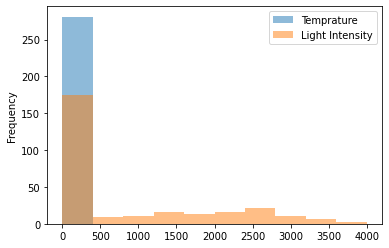

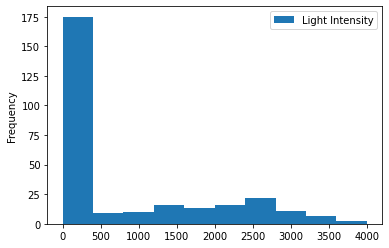

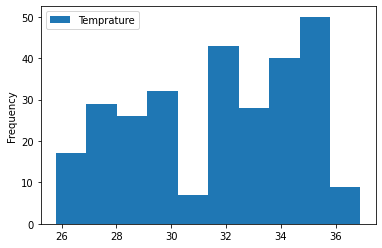

In [24]:
dataFrame_timeindexed.plot.hist(alpha=0.5)
dataFrame_timeindexed.plot.hist(x = "Temprature")
dataFrame_timeindexed.plot.hist(x="Light Intensity")

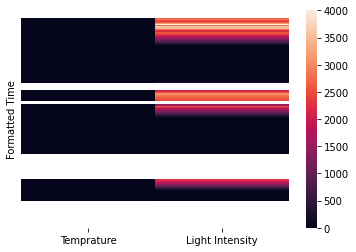

In [ ]:
ax = sns.heatmap(dataFrame_timeindexed, yticklabels= False)

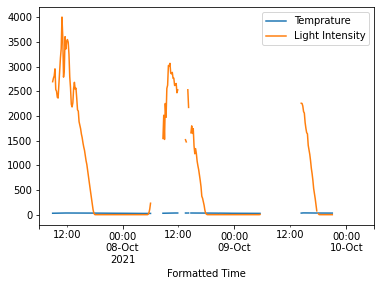

In [ ]:
dataFrame_timeindexed.plot.line()

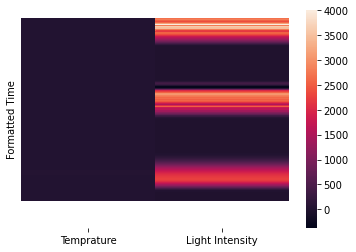

In [ ]:
df_quadratic = dataFrame_timeindexed.interpolate('quadratic')
ax = sns.heatmap(df_quadratic, yticklabels=False)

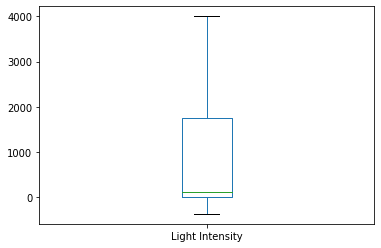

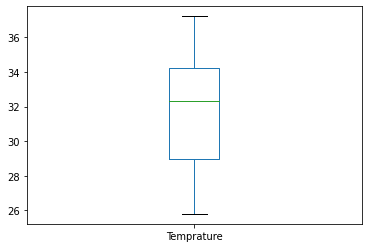

In [25]:
df_quadratic.plot.box(x="Temprature")
df_quadratic.plot.box(x="Light Intensity")

In [ ]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR)))]
    return df_final

    df_quadratic = remove_outlier_IQR(df_quadratic["Light Intensity"])
    df_quadratic = remove.head()

In [ ]:
df_quadratic=remove.plot.box()

NameError: ignored

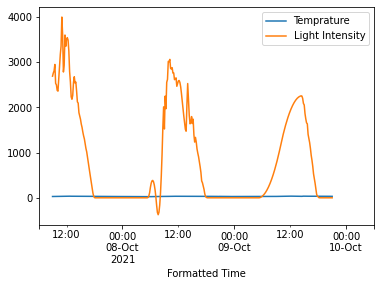

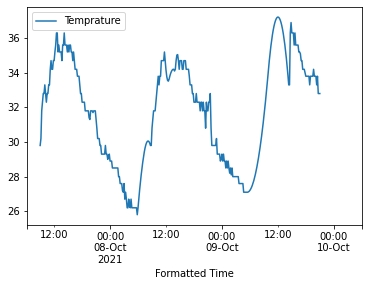

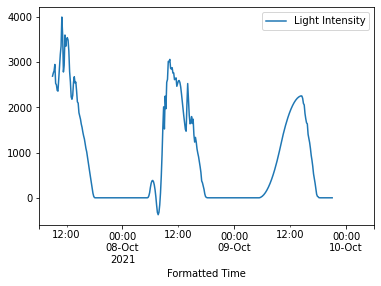

In [ ]:
df_quadratic.plot.line()
df_quadratic.plot.line(y="Temprature")
df_quadratic.plot.line(y="Light Intensity")

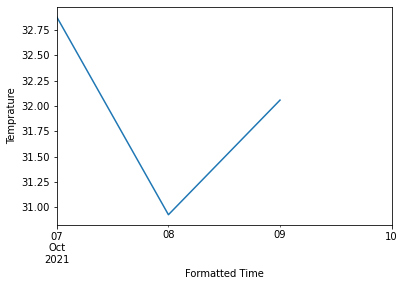

In [ ]:
df_avg_temp=df_quadratic["Temprature"].resample('D').mean()
df_avg_temp.plot.line(ylabel = "Temprature")

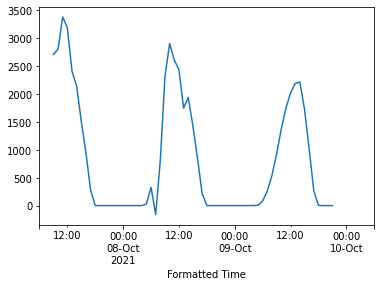

In [ ]:
df_avg_lux = df_quadratic["Light Intensity"].resample('H').mean()
df_avg_lux.plot.line()

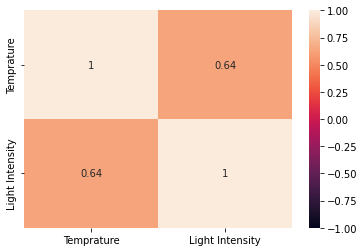

In [ ]:
ax = sns.heatmap(df_quadratic.corr(),vmin=-1, vmax=1, annot=True)

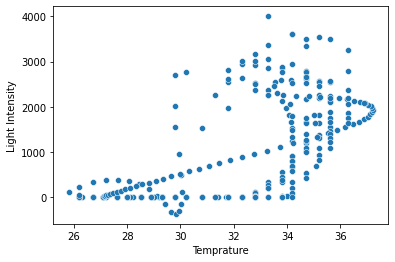

In [ ]:
scplt= sns.scatterplot(x="Temprature", y= "Light Intensity", data= df_quadratic)
ln = sns